In [1]:
import yfinance as yf
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
sto='^NSEI'

In [3]:
start_date=datetime.now()-timedelta(days=500)
end_date=datetime.now()-timedelta(days=5)

In [4]:
stock_data=yf.download(sto,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-27,17771.400391,17783.900391,17654.500000,17736.949219,17736.949219,324600
2022-10-28,17756.400391,17838.900391,17723.699219,17786.800781,17786.800781,250000
2022-10-31,17910.199219,18022.800781,17899.900391,18012.199219,18012.199219,227200
2022-11-01,18130.699219,18175.800781,18060.150391,18145.400391,18145.400391,349900
2022-11-02,18177.900391,18178.750000,18048.650391,18082.849609,18082.849609,270900


In [6]:
data=pd.DataFrame(stock_data)
datanew=data.iloc[:,[0,4,-1]]
datanew.head()

,Open,Adj Close,Volume
Date,,,
2022-10-27,17771.400391,17736.949219,324600
2022-10-28,17756.400391,17786.800781,250000
2022-10-31,17910.199219,18012.199219,227200
2022-11-01,18130.699219,18145.400391,349900
2022-11-02,18177.900391,18082.849609,270900


In [7]:
datanew['avg vol']=datanew['Volume'].shift(1).rolling(window=3).mean()
datanew=datanew.dropna().reset_index(drop=True)

<ipython-input-7-22d3a2ca09ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['avg vol']=datanew['Volume'].shift(1).rolling(window=3).mean()


In [8]:
datanew

,Open,Adj Close,Volume,avg vol
0,18130.699219,18145.400391,349900,267266.666667
1,18177.900391,18082.849609,270900,275700.000000
2,17968.349609,18052.699219,213000,282666.666667
3,18053.400391,18117.150391,267900,277933.333333
4,18211.750000,18202.800781,314800,250600.000000
...,...,...,...,...
327,22090.199219,22198.349609,252200,259100.000000
328,22214.099609,21951.150391,203000,228666.666667
329,21935.199219,21982.800781,360200,221000.000000
330,22048.300781,22338.750000,351500,271800.000000


In [9]:
datan=datanew[datanew['Volume']!=0]

In [10]:
datan.shape

(329, 4)

In [11]:
datan['next close']=datan['Adj Close'].shift(-1)
datan=datan.dropna().reset_index(drop=True)

<ipython-input-11-06b00bf5a622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datan['next close']=datan['Adj Close'].shift(-1)


In [12]:
datan

,Open,Adj Close,Volume,avg vol,next close
0,18130.699219,18145.400391,349900,267266.666667,18082.849609
1,18177.900391,18082.849609,270900,275700.000000,18052.699219
2,17968.349609,18052.699219,213000,282666.666667,18117.150391
3,18053.400391,18117.150391,267900,277933.333333,18202.800781
4,18211.750000,18202.800781,314800,250600.000000,18157.000000
...,...,...,...,...,...
323,22169.199219,22122.050781,207800,311333.333333,22198.349609
324,22090.199219,22198.349609,252200,259100.000000,21951.150391
325,22214.099609,21951.150391,203000,228666.666667,21982.800781
326,21935.199219,21982.800781,360200,221000.000000,22338.750000


In [13]:
datan['result']=(datan['Volume']>datan['avg vol'])&(datan['next close']>datan['Adj Close'])

In [14]:
datan

,Open,Adj Close,Volume,avg vol,next close,result
0,18130.699219,18145.400391,349900,267266.666667,18082.849609,False
1,18177.900391,18082.849609,270900,275700.000000,18052.699219,False
2,17968.349609,18052.699219,213000,282666.666667,18117.150391,False
3,18053.400391,18117.150391,267900,277933.333333,18202.800781,False
4,18211.750000,18202.800781,314800,250600.000000,18157.000000,False
...,...,...,...,...,...,...
323,22169.199219,22122.050781,207800,311333.333333,22198.349609,False
324,22090.199219,22198.349609,252200,259100.000000,21951.150391,False
325,22214.099609,21951.150391,203000,228666.666667,21982.800781,False
326,21935.199219,21982.800781,360200,221000.000000,22338.750000,True


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Layer,Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [16]:
model=Sequential()
model.add(Dense(10,input_dim=3,kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
x=datan.iloc[:,[1,2,3]]
y=datan.iloc[:,5]

In [18]:
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=0.20)

Epoch 1/20
4/4 [==============================] - 1s 84ms/step - loss: 0.6840 - accuracy: 0.7879 - val_loss: 0.6808 - val_accuracy: 0.7519
Epoch 2/20
4/4 [==============================] - 0s 18ms/step - loss: 0.6776 - accuracy: 0.7879 - val_loss: 0.6761 - val_accuracy: 0.7519
Epoch 3/20
4/4 [==============================] - 0s 19ms/step - loss: 0.6725 - accuracy: 0.7879 - val_loss: 0.6717 - val_accuracy: 0.7519
Epoch 4/20
4/4 [==============================] - 0s 18ms/step - loss: 0.6673 - accuracy: 0.7879 - val_loss: 0.6677 - val_accuracy: 0.7519
Epoch 5/20
4/4 [==============================] - 0s 19ms/step - loss: 0.6629 - accuracy: 0.7879 - val_loss: 0.6638 - val_accuracy: 0.7519
Epoch 6/20
4/4 [==============================] - 0s 32ms/step - loss: 0.6580 - accuracy: 0.7879 - val_loss: 0.6599 - val_accuracy: 0.7519
Epoch 7/20
4/4 [==============================] - 0s 34ms/step - loss: 0.6535 - accuracy: 0.7879 - val_loss: 0.6560 - val_accuracy: 0.7519
Epoch 8/20
4/4 [===========

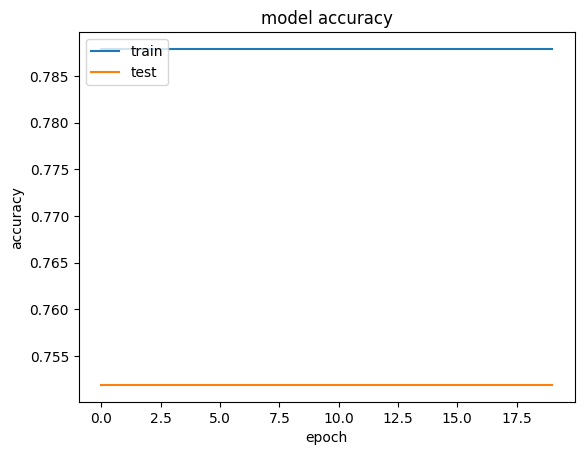

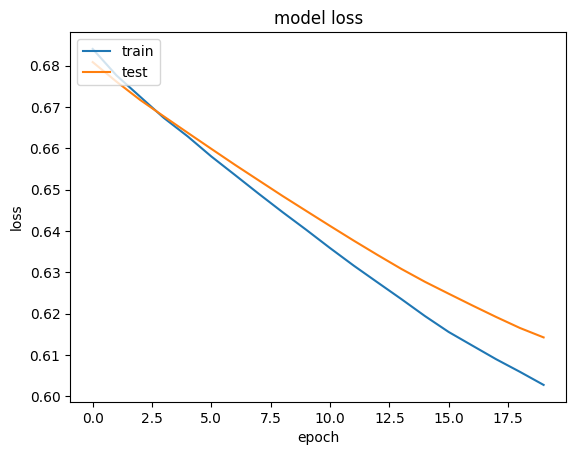

In [19]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20,batch_size=20)
plt.plot(history.history[ "accuracy" ])
plt.plot(history.history[ "val_accuracy" ])
plt.title( "model accuracy" )
plt.ylabel( "accuracy" )
plt.xlabel( "epoch" )
plt.legend([ "train" , "test" ], loc= "upper left" )
plt.show()
# summarize history for loss
plt.plot(history.history[ "loss" ])
plt.plot(history.history[ "val_loss" ])
plt.title( "model loss" )
plt.ylabel( "loss" )
plt.xlabel( "epoch" )
plt.legend([ "train" , "test" ], loc= "upper left" )
plt.show()

In [20]:
scores = model.evaluate(xtest, ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7519
accuracy: 75.19%
